# GRU Model

In [ ]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-02-20 14:10:49.994929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 14:10:50.712402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 14:10:50.712471: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 14:10:52.474085: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Load and PreProcess 

In [ ]:
data = pd.read_csv('data/PMS_data.csv',nrows=100000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [4]:
new_set = data[['Flow','Occupy']].copy()

In [5]:
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [6]:
new_set['Flow'] = np.around(new_set['Flow'])
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [7]:
new_set_plot = new_set.values

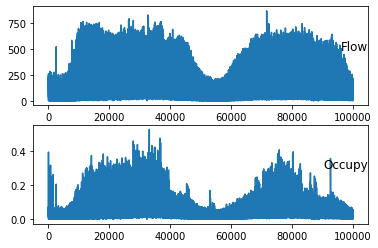

In [8]:
groups = [0, 1]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(new_set_plot[:, group])
    plt.title(new_set.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
scaler = StandardScaler()

In [19]:
new_set

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493
...,...,...
99995,127.0,0.0326
99996,127.0,0.0227
99997,124.0,0.0402
99998,99.0,0.0248


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM ,Dense , Dropout,Activation,Lambda, Bidirectional
import tensorflow as tf

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = new_set[["Flow"]]
#data = data[['traffic_volume']]

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Create sequences of data
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length-1):
        x.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)

seq_length = 30
trainX, trainY = create_sequences(train_data, seq_length)
testX, testY = create_sequences(test_data, seq_length)

# Reshape the data for the LSTM model
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))



In [23]:

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.GRU(64, input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])


In [24]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY))

# Make predictions on the test data
testPredict = model.predict(testX)


Epoch 1/50
1250/1250 [==============================] - 19s 14ms/step - loss: 0.0167 - val_loss: 0.0148
Epoch 2/50
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0159 - val_loss: 0.0143
Epoch 3/50
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0149 - val_loss: 0.0132
Epoch 4/50
1250/1250 [==============================] - 17s 14ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 5/50
1250/1250 [==============================] - 17s 14ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 6/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 7/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.0061 - val_loss: 0.0069
Epoch 8/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 9/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 10/50
1250/1250 [==============================] - 19s 15m

In [25]:

# Inverse transform the predictions and actual values
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
rmse = np.sqrt(np.mean((testPredict - testY) ** 2))
print('Test RMSE: %.2f' % rmse)


Test RMSE: 169.07


In [26]:
# Make predictions on the test data
predictions = model.predict(testX)
predictions = np.concatenate((predictions, testY.reshape(-1,1)), axis=1)
predictions = scaler.inverse_transform(predictions)



625/625 [==============================] - 3s 4ms/step


In [27]:
testYshape=testY.reshape(19969,1)
print(testY.shape)
print(testYshape.shape)
print(testPredict.shape)
r2s = metrics.r2_score(y_true=testYshape,y_pred=testPredict)
r2s

(1, 19969)
(19969, 1)
(19969, 1)


0.8772371605674288

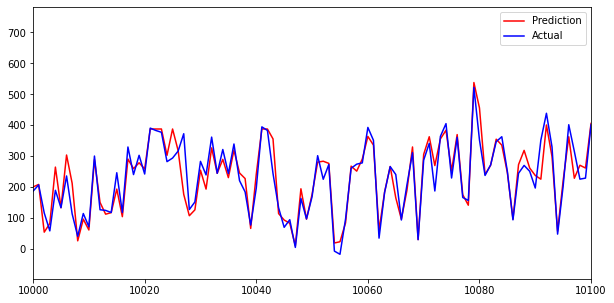

In [28]:
plt.figure(figsize=(10,5))
plt.plot(testYshape,color = 'red',label = 'Prediction')
plt.plot(testPredict,color = 'blue',label = 'Actual')
plt.legend()
plt.xlim(10000,10100)
plt.show()